<a href="https://colab.research.google.com/github/gptix/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Jud_Taylor_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
from functools import reduce
from math import sqrt
# from statistics import stdev #, mean
import numpy as np
from numpy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt

sales_p_wk = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
# print(sales_p_wk)

print("Mean: " + str(sum(sales_p_wk) / len(sales_p_wk)))

def my_mean(vals):
  return (sum(vals)/len(vals))

print(my_mean(sales_p_wk))
# print(mean(sales_p_wk))
print( np.mean(sales_p_wk))

Mean: 3052.714285714286
3052.714285714286
3052.714285714286


In [0]:
def sq_o_df(v, m):
 return((v-m)**2)


def my_var(vals):
  n = len(vals)
  m = my_mean(vals)
  squares_of_diffs = list(map(lambda x: sq_o_df(x, m), vals))
  sum_of_sqods = sum(squares_of_diffs)

  return(sum_of_sqods / n)


print(my_var(sales_p_wk))

print(np.var(sales_p_wk))

183761.06122448976
183761.06122448976


In [0]:
def my_std(vals):
  return(sqrt(my_var(vals)))

print(my_std(sales_p_wk))

print(np.std(sales_p_wk))

428.67360686714756
428.67360686714756


In [0]:
def var_and_std(vals):
  return((my_var(vals), my_std(vals)))

print(var_and_std(sales_p_wk))

(183761.06122448976, 428.67360686714756)


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
visitor_count = [127, 80, 105, 92, 120, 115, 93]

sales = pd.Series(sales_p_wk)
vis_count = pd.Series(visitor_count)

my_array = np.array([sales_p_wk, visitor_count])

print("Numpy covariance matrix: ")
print(np.cov(my_array))
# 
print()
covar = sales.cov(vis_count)
print("Pandas covariance: " + str(covar))

Numpy covariance matrix: 
[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]

Pandas covariance: 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
visits_std = my_std(visitor_count)

print(visits_std)

15.792015549069118


In [0]:
sales_std = my_std(sales_p_wk)

print(sales_std)

428.67360686714756


In [0]:
# divide our covariance values by the product of the standard deviations of the two variables
r = covar/(sales_std * visits_std)

print(r)

print(pd.Series.corr(sales, vis_count))

1.123306307450706
0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
from statistics import mean, stdev
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=0)

# df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv', index_col=0)
df.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
# pclass              float64
# survived            float64
# name                 object
# sex                  object
# age                 float64
# sibsp               float64
# parch               float64
# ticket               object
# fare                float64
# cabin                object
# embarked             object
# boat                 object
# body                float64
# home.dest            object
# has_cabin_number      int64

numeric_col_names = ['pclass',
'survived',
'age',
'sibsp',
'parch',
'fare',
'body',
'has_cabin_number']

In [0]:
df_numeric = df[numeric_col_names].copy()

print("Covariance matrix for numeric series.")
df_numeric.cov()

Covariance matrix for numeric series.


,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
print("Correlation matrix for numeric series.")
df_numeric.corr()

Correlation matrix for numeric series.


,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

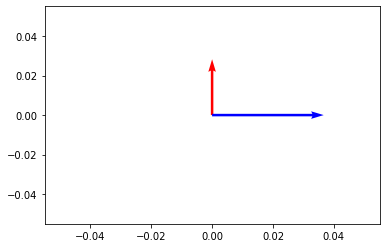

In [0]:
# A synonym for "orthogonal" is "perpendicular".
v1 = [0,1]
v2 = [2,0]

V = np.array([v1,v2])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=6)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
va = np.array([-5, 3, 7])
vb = np.array([6, -8, 2])

print( va.dot(vb) )


# They are not orthogonal. If they were, their dot product would be zero.

def ortho_yn (va, vb):
  return (va.dot(vb) ==0)

-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

c_norm_squared = (la.norm(c))**2

print("c_norm_squared: " + str(c_norm_squared))
print()

c_dot_c = c.dot(c)

print("c_dot_c: " + str(c_dot_c))
print()

cT = np.transpose(c)
cTc = np.matmul(cT, c)
print("cTc: " + str(cTc))
print()

# These values are all the same.

c_norm_squared: 665.0

c_dot_c: 665

cTc: 665



# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\hat{i} + 12\hat{j}
\end{align}

---

\begin{align}
d = 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
# Turn any non-zero vector into a unit vector by dividing it by its norm (length/magnitude).

def unitize(vec):
  nrm = la.norm(vec)
  
  return (vec / nrm)

f = np.array([4, 12, 11, 9, 2])

print(unitize(f))

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

Linearly Independent


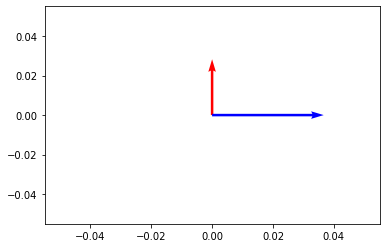

In [0]:
v1 = [0,1]
v2 = [2,0]

V = np.array([v1,v2])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=6)
print("Linearly Independent")
plt.show()

Linearly Dependent


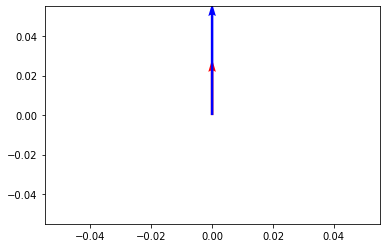

In [0]:
v1 = [0,1]
v2 = [0,2]

V = np.array([v1,v2])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=6)
print("Linearly Dependent")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

#$\mathbb{R}$

In [0]:
# R

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}


---
put in matrix form

\begin{align} M = \begin{bmatrix} 
1 & 2 & 3 \\
-1 & 0 & 7 \\ 
 4 & 8  & 2\end{bmatrix}
\end{align}


Add l to m
\begin{align} M = \begin{bmatrix} 
1 & 2 & 3 \\
0 & 2 & 10 \\ 
 4 & 8  & 2\end{bmatrix}
\end{align}

divide m by 2
\begin{align} M = \begin{bmatrix} 
1 & 2 & 3 \\
0 & 1 & 5 \\ 
 4 & 8  & 2\end{bmatrix}
\end{align}


Subtract 4 times l from n

\begin{align} M = \begin{bmatrix} 
1 & 2 & 3 \\
0 & 1 & 5 \\ 
0 & 0  & -10\end{bmatrix}
\end{align}

divide n by -10
\begin{align} M = \begin{bmatrix} 
1 & 2 & 3 \\
0 & 1 & 5 \\ 
0 & 0  & 1\end{bmatrix}
\end{align}

Count of non-zeroed rows = Rank = 3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



X (red) and Y (blue) are a unit basis in R^2.


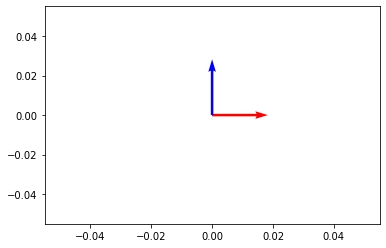

In [0]:
X = [1,0]
Y = [0,1]

V = np.array([X,Y])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=6)
print("X (red) and Y (blue) are a unit basis in R^2.")
plt.show()

## 6.2 What does it mean to form a basis?

A basis is a minimal set of vectors that have a span of a space.

For R^n, the unit basis is composed of n vectors.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}
---
add row 1 to row 2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
0 & 2 & 10 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

subtract 4 x row 1 from row 3
\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
0 & 2 & 10 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

The rank of P = 3.




## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the count n of dimensions that the vectors composing the matrix span. 

The **n** in $\mathbb{R}^n$


# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


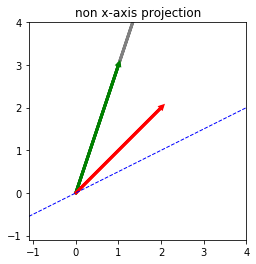

In [0]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,3] 
w = [2,2]
proj = np.multiply(2.4,v)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 1/2*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

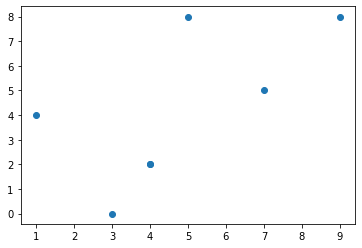

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()